In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
data =pd.read_csv('/content/drive/MyDrive/News/collected_data/news_classification.csv')
data.head()

,headline,category,newspaper name
0,"হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই, কেন!",Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা!,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor


In [4]:
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,Amusement,16491
1,IT,2806
2,International,48813
3,national,24935
4,politics,10589
5,sports,33177


In [5]:
data['category'].replace([0,1,2,3,4,5],['Amusement','IT','International','national','politics','sports'],inplace=True)

In [6]:
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,Amusement,16491
1,IT,2806
2,International,48813
3,national,24935
4,politics,10589
5,sports,33177


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136811 entries, 0 to 136810
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   headline        136805 non-null  object
 1   category        136811 non-null  object
 2   newspaper name  136811 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB


In [8]:
data.dropna(inplace=True)

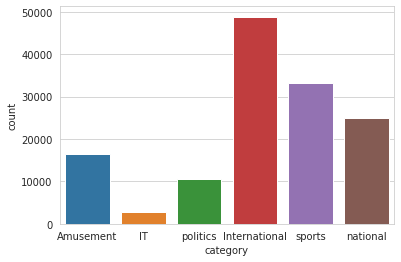

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'category', data = data)

In [10]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [11]:
data['headline'] = data['headline'].apply(process_sentences)  
data

,headline,category,newspaper name
0,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,Amusement,Jugantor
1,এত দামি জুতা পরেন প্রিয়াঙ্কা,Amusement,Jugantor
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor
...,...,...,...
136806,অন্যরকম উদযাপন,national,Dainik Inqilab
136807,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab
136808,রাজনীতি ছাড়তে চান,national,Dainik Inqilab
136809,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab


In [12]:
# Remove the Text with least words
data['length'] = data['headline'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 5 Small Text 
Total Text: 136800


In [13]:
dataset

,headline,category,newspaper name,length
0,হঠাৎ করে কেঁদে ফেললেন ঐশ্বরিয়া রাই কেন,Amusement,Jugantor,7
1,এত দামি জুতা পরেন প্রিয়াঙ্কা,Amusement,Jugantor,5
2,মৃত্যুর আগে শ্রীদেবীর শেষ ভিডিও,Amusement,Jugantor,5
3,কৌতুক অভিনেতা কপিল শর্মার ঘরে নতুন অতিথি,Amusement,Jugantor,7
4,বিয়ের পর কোহলির জন্য যে ত্যাগ করলেন আনুশকা,Amusement,Jugantor,8
...,...,...,...,...
136795,অন্যরকম উদযাপন,national,Dainik Inqilab,2
136796,তিস্তাসহ অভিন্ন নদীর ন্যায্য হিস্যা দাবিতে বিক...,national,Dainik Inqilab,7
136797,রাজনীতি ছাড়তে চান,national,Dainik Inqilab,3
136798,বিএনপি নির্বাচনী ভীতিতে ভুগছে,national,Dainik Inqilab,4


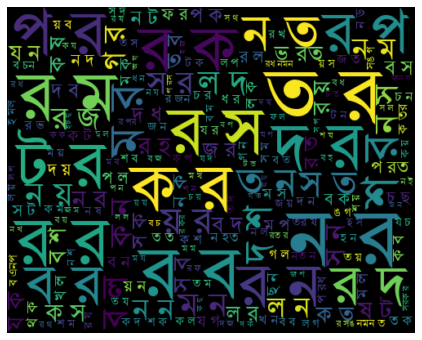

In [14]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['headline']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/News/collected_data/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [15]:
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.headline) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].headline) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.category==label].headline)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].headline))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  International
Number of Documents:48812
Number of Words:299448
Number of Unique Words:28160
Most Frequent Words:

নিহত	3399
না	2133
নিয়ে	1634
ট্রাম্প	1475
মার্কিন	1434
ও	1342
থেকে	1332
ভারতের	1213
যুক্তরাষ্ট্র	1210
ভারত	1192

Class Name :  sports
Number of Documents:33169
Number of Words:154667
Number of Unique Words:18348
Most Frequent Words:

বাংলাদেশ	1613
না	1124
টিভিতে	959
জয়	895
বাংলাদেশের	883
দেখুন	849
শুরু	783
খেলা	734
নিয়ে	689
সাকিব	676

Class Name :  national
Number of Documents:24934
Number of Words:154688
Number of Unique Words:20167
Most Frequent Words:

না	1444
হবে	1292
ও	1215
প্রধানমন্ত্রী	1012
আজ	755
থেকে	617
কাদের	613
খালেদা	567
বিএনপি	558
নিয়ে	556

Class Name :  Amusement
Number of Documents:16490
Number of Words:98297
Number of Unique Words:16600
Most Frequent Words:

নতুন	1158
নিয়ে	1074
ও	1003
গান	683
ভিডিও	518
না	484
নাটক	470
খান	462
চলচ্চিত্র	416
আজ	413

Class Name :  politics
Number of Documents:10589
Number of Words:73908
Number of Unique Words:102

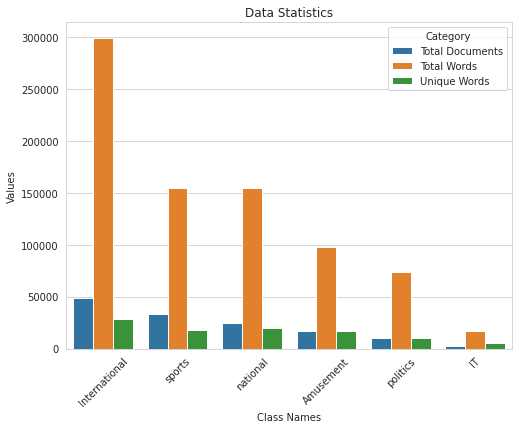

In [16]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

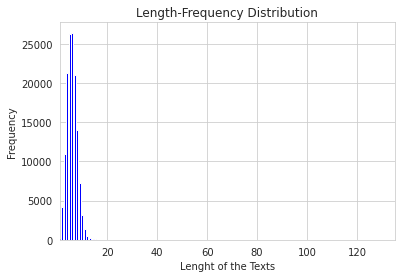

Maximum Length of a Text: 21
Minimum Length of a Text: 1
Average Length of a Text: 6.0


In [17]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.headline.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [18]:
# Label Encoding Function
                                       
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
  
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [19]:
# Dataset Splitting Function

def dataset_split(feature_space,category):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,train_size = 0.8,
                                                  test_size = 0.20,random_state =22,stratify=category)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [20]:
def calc_gram_tfidf(headline,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X

In [21]:
# Unigram Tf-idf value calculation
          

def calc_unigram_tfidf(headline):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X



In [22]:
# Bi-gram Tf-idf value calculation


def calc_bigram_tfidf(headline):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X




In [23]:
# Tri-gram Tf-idf value calculation

def calc_trigram_tfidf(headline):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headline)
    
    return tfidf,X

In [24]:
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [25]:
def model_defination():
    
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    xgb_model = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)
    
    model_names = ['Logistic Regression','Naive Bayes','KNN','SGD','XGB']
    ml_models = [lr_model,mnb_model,knn_model,sgd_model,xgb_model]
    
    return ml_models,model_names

In [26]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [27]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','MNB','KNN','SGD','XGB'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [28]:
path = "/content/drive/MyDrive/News/collected_data/json/"

In [29]:
import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.headline,gram)
    labels = label_encoding(dataset.category,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_5_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 56696

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136800 
	Training		 109440 
	Test			 27360


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 447515

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136800 
	Training		 109440 
	Test			 27360


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 895154

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136800 
	Training		 109440 
	Test			 27360


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [30]:
accuracy1 = json.load(open('/content/drive/MyDrive/News/collected_data/json/ml_performance_5_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,83.15,83.15,83.15,83.15
MNB,82.14,82.14,82.14,82.14
KNN,75.51,75.51,75.51,75.51
SGD,72.88,72.88,72.88,72.88
XGB,55.91,55.91,55.91,55.91


In [31]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by LR at = 83.15
Highest F1-Score achieved by LR at = 83.15
Highest Precision Score achieved by LR at = 83.15
Highest Recall Score achieved by LR at = 83.15


In [32]:
accuracy2 = json.load(open('/content/drive/MyDrive/News/collected_data/json/ml_performance_5_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,82.11,82.11,82.11,82.11
MNB,80.49,80.49,80.49,80.49
KNN,74.79,74.79,74.79,74.79
SGD,64.67,64.67,64.67,64.67
XGB,55.86,55.86,55.86,55.86


In [33]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by LR at = 82.11
Highest F1-Score achieved by LR at = 82.11
Highest Precision Score achieved by LR at = 82.11
Highest Recall Score achieved by LR at = 83.15


In [34]:
accuracy3 = json.load(open('/content/drive/MyDrive/News/collected_data/json/ml_performance_5_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,80.82,80.82,80.82,80.82
MNB,78.84,78.84,78.84,78.84
KNN,74.57,74.57,74.57,74.57
SGD,59.43,59.43,59.43,59.43
XGB,55.84,55.84,55.84,55.84


In [35]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by LR at = 80.82000000000001
Highest F1-Score achieved by LR at = 80.82000000000001
Highest Precision Score achieved by LR at = 80.82000000000001
Highest Recall Score achieved by LR at = 80.82000000000001


# **Final Algorithm**


*   Final N-gram: Uni-gram
*   Final Model: Logistic Regression(LR)




In [36]:
# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(dataset.headline)

# Encode the labels
lables = label_encoding(dataset.category,False)

# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,category=lables)

Feature Size :======> 56696

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 136800 
	Training		 109440 
	Test			 27360


In [37]:
classifier1 = LogisticRegression(random_state = 123, max_iter = 10000)
classifier1.fit(X_train, y_train)

y_pred = classifier1.predict(X_test)

In [38]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 89.9%
Test Accuracy is : 83.15%


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3298
           1       0.81      0.34      0.48       561
           2       0.84      0.93      0.88      9762
           3       0.70      0.69      0.70      4987
           4       0.71      0.57      0.63      2118
           5       0.91      0.92      0.92      6634

    accuracy                           0.83     27360
   macro avg       0.81      0.71      0.74     27360
weighted avg       0.83      0.83      0.83     27360



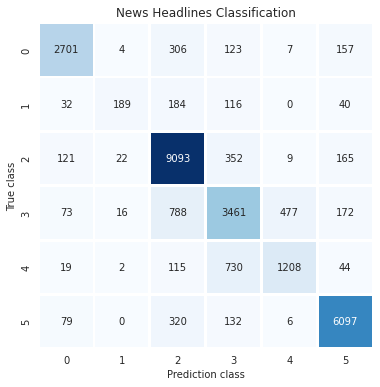

In [40]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True,cmap='Blues',cbar=False,linewidth=2,fmt='d')
plt.title('News Headlines Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [ ]:
pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
Note: you may need to restart the kernel to use updated packages.


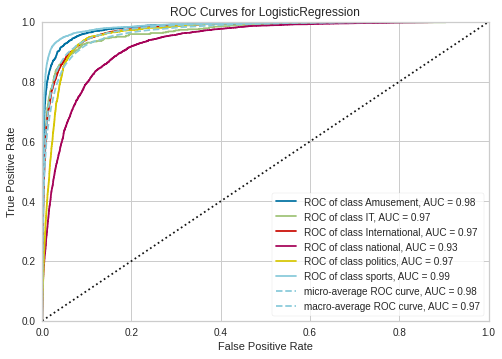

In [41]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifier1, classes=['Amusement','IT','International','national','politics','sports'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   